# Analysis of Lennard Jones Fluid Simulations with Thermostats


### Sim with Velocity Verlet algorithm and thermostats

### Comparison Velocity Rescaling and Andersen Thermostat

In [9]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import pandas as pd

In [2]:
#data folder and files
data_folder = 'code_Lennard_Jones_fluid_with_thermostats/output/'
files = os.listdir(data_folder)
files = sorted(files)

In [18]:
#Parameters
dt = 0.01
T = 2

#Cut
N_cut = 100 #NB: the system is already equilibrated with Monte Carlo
thinning = 10

In [29]:
col = ['thermostat', 'N', 'sigma_T', 'avg_T', 'sigma_E', 'avg_E']
df = pd.DataFrame(columns = col)

In [31]:
#Analysis
for file in files:
    #loading the data
    data = np.loadtxt(data_folder+file)
    time = data[:, 0]
    kinetic_temperature = data[:, 1]

    #extracting the number of particles
    pattern_N = r"N_(.*?)_"
    N = float(re.findall(pattern_N, file)[0])

    #etracting the thermostat
    pattern_thermostat = r"Jones_(.*?)_ic"
    thermostat = re.findall(pattern_thermostat, file)[0]

    sigma_T = np.std(kinetic_temperature[N_cut::thinning])
    avg_T = np.mean(kinetic_temperature[N_cut::thinning])

    sigma_E = 3*N*sigma_T/2
    avg_E = 3*N*avg_T/2

    df.loc[len(df)] = [thermostat, N, sigma_T, avg_T, sigma_E, avg_E]

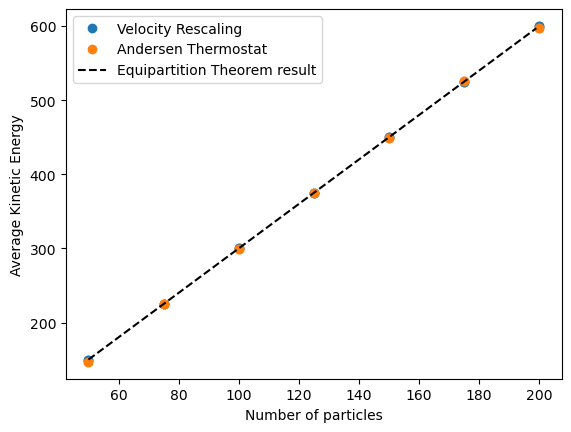

In [42]:
plt.plot(df['N'][df['thermostat']=='Rescaling'], df['avg_E'][df['thermostat']=='Rescaling'], 'o', label = 'Velocity Rescaling')
plt.plot(df['N'][df['thermostat']=='Andersen'], df['avg_E'][df['thermostat']=='Andersen'], 'o', label = 'Andersen Thermostat')
plt.plot(np.arange(50, 200), 3/2*np.arange(50, 200)*T, 'k--', label = 'Equipartition Theorem result')
plt.xlabel('Number of particles')
plt.ylabel('Average Kinetic Energy')
plt.legend()
plt.savefig('plots/avg_E_vs_N.png')

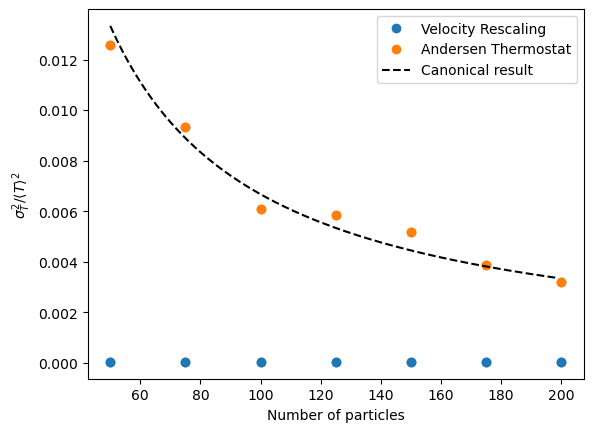

In [51]:
plt.plot(df['N'][df['thermostat']=='Rescaling'], (df['sigma_T'][df['thermostat']=='Rescaling'])**2/(df['avg_T'][df['thermostat']=='Rescaling'])**2, 'o', label = 'Velocity Rescaling')
plt.plot(df['N'][df['thermostat']=='Andersen'], (df['sigma_T'][df['thermostat']=='Andersen'])**2/(df['avg_T'][df['thermostat']=='Andersen'])**2, 'o', label = 'Andersen Thermostat')
plt.plot(np.arange(50, 200), 2./(3.*np.arange(50, 200)), 'k--', label = 'Canonical result')
plt.xlabel('Number of particles')
plt.ylabel(r'$\sigma_T^2/\langle T \rangle^2$')
plt.legend()
plt.savefig('plots/sigma_T_vs_N.png')